# Gravitational Waves in Closed Universes Metric 1 - Gowdy
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 21, 2022

There are several coordinate transformations that give different metrics, here we concentrate on equation one.  What is confusing is that half of the field equations are in terms of u and v, the other half are in terms of theta and t.  Unfortunately, we'd have to compute the field equations for two different metrics, so we just do one here.  See discussion of equations 29 and 30 for most general form

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.27.826

In [69]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [70]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [71]:
t,theta,sigma,delta,dt,dtheta,dsigma,ddelta,u,v,du,dv,L = symbols('t theta sigma delta dt dtheta dsigma ddelta u v du dv L')

In [72]:
a = Function('a')(u,v)
a

In [73]:
W = Function('W')(u,v)
W

In [74]:
#  Be careful here... there's the variable R and then Ricci R.  Use different variable here...
r = Function('r')(u,v)
r

In [75]:
B = Function('B')(u,v)
B

In [76]:
a = Function('a')(u,v)
a

In [77]:
psi = Function('psi')(u,v)
psi

In [78]:
variables = Matrix([u,v,sigma,delta])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢σ⎥
⎢ ⎥
⎣δ⎦

In [79]:
differentials = Matrix([du,dv,dsigma,ddelta])
differentials 

⎡  du  ⎤
⎢      ⎥
⎢  dv  ⎥
⎢      ⎥
⎢dsigma⎥
⎢      ⎥
⎣ddelta⎦

In [80]:
lineElement1 = exp(2*a)*(  ((dv-du)/2)**2 - ((dv+du)/2)**2) + r*(B**-1 * exp(2*W) * dsigma**2 + B*exp(-2*W) * ddelta**2)
lineElement1

In [81]:
equation3 = Eq(psi, W - Rational(1,2)*log(B))
equation3

In [82]:
wsubs = Eq(W,solve(equation3,W)[0])
wsubs

In [83]:
lineElement = expand(lineElement1.subs(wsubs.lhs,wsubs.rhs))
lineElement 

In [84]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡                2⋅a(u, v)                                          ⎤
⎢              -ℯ                                                   ⎥
⎢     0        ────────────          0                    0         ⎥
⎢                   2                                               ⎥
⎢                                                                   ⎥
⎢  2⋅a(u, v)                                                        ⎥
⎢-ℯ                                                                 ⎥
⎢────────────       0                0                    0         ⎥
⎢     2                                                             ⎥
⎢                                                                   ⎥
⎢                                     2⋅ψ(u, v)                     ⎥
⎢     0             0        r(u, v)⋅ℯ                    0         ⎥
⎢                                                                   ⎥
⎢                                                         -2⋅ψ(u, v)⎥
⎣     0             

In [85]:
import sympy

In [86]:
m = sympy.Array(g)
m

⎡                2⋅a(u, v)                                          ⎤
⎢              -ℯ                                                   ⎥
⎢     0        ────────────          0                    0         ⎥
⎢                   2                                               ⎥
⎢                                                                   ⎥
⎢  2⋅a(u, v)                                                        ⎥
⎢-ℯ                                                                 ⎥
⎢────────────       0                0                    0         ⎥
⎢     2                                                             ⎥
⎢                                                                   ⎥
⎢                                     2⋅ψ(u, v)                     ⎥
⎢     0             0        r(u, v)⋅ℯ                    0         ⎥
⎢                                                                   ⎥
⎢                                                         -2⋅ψ(u, v)⎥
⎣     0             

In [87]:
from einsteinpy.symbolic import *

In [88]:
syms = sympy.symbols("u v sigma delta")
u,v,sigma,delta = syms

In [89]:
metric = MetricTensor(m,syms)

In [90]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                                      
⎢                                                                                                                                      
⎢                                                                                                                                      
⎢⎡  ∂                                                                                                                                  
⎢⎢2⋅──(a(u, v))  0                                0                                                               0                    
⎢⎢  ∂u                                                                                                                                 
⎢⎢                                                                                                                                     
⎢⎢      0        0                              

In [91]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                        2                                                                             
⎢                                                       ∂                          2                                                   
⎢                            ∂           ∂             ───(r(u, v))   ⎛∂          ⎞                                                    
⎢                      2   2⋅──(a(u, v))⋅──(r(u, v))     2            ⎜──(r(u, v))⎟                                            2       
⎢         ⎛∂          ⎞      ∂u          ∂u            ∂u             ⎝∂u         ⎠             ∂           ∂                 ∂        
⎢     - 2⋅⎜──(ψ(u, v))⎟  + ───────────────────────── - ──────────── + ──────────────        - 2⋅──(ψ(u, v))⋅──(ψ(u, v)) - 2⋅─────(a(u, 
⎢         ⎝∂u         ⎠             r(u, v)              r(u, v)           2                    ∂u          ∂v              ∂v ∂u      
⎢                                               

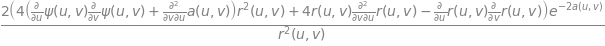

In [92]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [93]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                                                 2                    
⎢                                                                                                                ∂                     
⎢                                                                                     ∂           ∂             ───(r(u, v))   ⎛∂      
⎢                                                                               2   2⋅──(a(u, v))⋅──(r(u, v))     2            ⎜──(r(u,
⎢                                                                  ⎛∂          ⎞      ∂u          ∂u            ∂u             ⎝∂u     
⎢                                                              - 2⋅⎜──(ψ(u, v))⎟  + ───────────────────────── - ──────────── + ────────
⎢                                                                  ⎝∂u         ⎠             r(u, v)              r(u, v)           2  
⎢                                               

In [94]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [95]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [96]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                        2                                                                             
⎢                                                       ∂                          2                                                   
⎢                            ∂           ∂             ───(r(u, v))   ⎛∂          ⎞                                                    
⎢                      2   2⋅──(a(u, v))⋅──(r(u, v))     2            ⎜──(r(u, v))⎟                                            2       
⎢         ⎛∂          ⎞      ∂u          ∂u            ∂u             ⎝∂u         ⎠             ∂           ∂                 ∂        
⎢     - 2⋅⎜──(ψ(u, v))⎟  + ───────────────────────── - ──────────── + ──────────────        - 2⋅──(ψ(u, v))⋅──(ψ(u, v)) - 2⋅─────(a(u, 
⎢         ⎝∂u         ⎠             r(u, v)              r(u, v)           2                    ∂u          ∂v              ∂v ∂u      
⎢                                               

In [97]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                   2                                                                                  
⎢                                                  ∂                          2                                     2                  
⎢                       ∂           ∂             ───(r(u, v))   ⎛∂          ⎞                                     ∂                   
⎢                 2   2⋅──(a(u, v))⋅──(r(u, v))     2            ⎜──(r(u, v))⎟                                   ─────(r(u, v))        
⎢    ⎛∂          ⎞      ∂u          ∂u            ∂u             ⎝∂u         ⎠                                   ∂v ∂u                 
⎢- 2⋅⎜──(ψ(u, v))⎟  + ───────────────────────── - ──────────── + ──────────────                                  ──────────────        
⎢    ⎝∂u         ⎠             r(u, v)              r(u, v)           2                                             r(u, v)            
⎢                                               

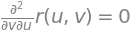

In [119]:
#  This is the wave equation in null coordinates corresponding to equation 7
equation7 = Eq(einsteinSimplified[1,0].args[1],0)
equation7

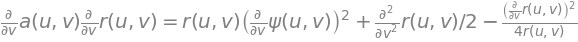

In [101]:
equation4 = Eq((r/2)*ricciSimplified[1,1].args[3],expand((r/2)*solve( ricciSimplified[1,1],ricciSimplified[1,1].args[3])[0]))
equation4

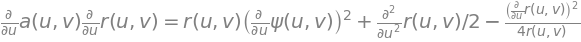

In [110]:
equation5 = Eq((r/2)*ricciSimplified[0,0].args[3], expand((r/2)*solve(ricciSimplified[0,0],ricciSimplified[0,0].args[3])[0]))
equation5

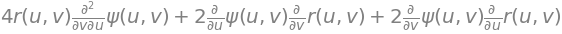

In [122]:
#  I believe this corresponds to equation 6 but in null coordinates
equation6 = (ricciSimplified[2,2].args[1] - ricciSimplified[3,3].args[1])
equation6 

In [131]:
#  Trying to get equation 9 
equation4.subs(diff(r,v),0).doit()  